# Sentimen Analysis terhadap review amazon

## Data wrangling

Donwload Library

In [ ]:
!pip install nltk
!pip install textblob
!pip install wordcloud

Upload data

In [ ]:
# Import Library
import matplotlib.pyplot as plt
import nltk
import pandas as pd

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [ ]:
# Setting tampilan ketika menampilkan dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mikti/amazon_reviews.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1.00,Do not waste your money.,1374537600,2013-07-23,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5.00,Great item!,1377129600,2013-08-22,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5.00,Fast and reliable memory card,1396224000,2014-03-31,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5.00,Great little card,1379289600,2013-09-16,448,0,0


In [ ]:
df['reviewText']

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [ ]:
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.00,4915.00,4915.00,4915.00,4915.00
mean,4.59,1379465001.67,437.37,1.31,1.52
std,1.00,15818574.32,209.44,41.62,44.12
min,1.00,1339200000.00,1.00,0.00,0.00
25%,5.00,1365897600.00,281.00,0.00,0.00
50%,5.00,1381276800.00,431.00,0.00,0.00
75%,5.00,1392163200.00,601.00,0.00,0.00
max,5.00,1406073600.00,1064.00,1952.00,2020.00


## Data cleansing dan preprocessing

In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,1
helpful,0
reviewText,1
overall,0
summary,0
unixReviewTime,0
reviewTime,0
day_diff,0


In [ ]:
# Menampilkan baris yang mengandung nilai null
data_null = df[df.isnull().any(axis=1)]
print(data_null)

         reviewerID        asin       reviewerName helpful  reviewText  overall                      summary  unixReviewTime  reviewTime  day_diff  helpful_yes  total_vote
0    A3SBTW3WS4IQSN  B007WTAJTO                NaN  [0, 0]  No issues.     4.00                   Four Stars      1406073600  2014-07-23       138            0           0
125  A1KN5OQGRNENU0  B007WTAJTO  Alexander Stevens  [2, 3]         NaN     5.00  Great Card With Great Price      1345507200  2012-08-21       839            2           3


In [ ]:
# Manipulasi text menjadi huruf kecil semuaaaaa
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText']

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


Manipulasi untuk mengganti teks yang memuat angka

In [ ]:
# Melihat text yang memiliki angka didalamnya
df['reviewText'][df['reviewText'].str.contains('\d', na=False)]

,reviewText
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
5,it's mini storage. it doesn't do anything els...
7,it's hard to believe how affordable digital ha...
8,works in a htc rezound. was running short of ...
...,...
4909,i bought this to stretch the capability of my ...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...


In [ ]:
# Manipulasi text menghilangkan angka
df['reviewText'] = df['reviewText'].str.replace('\d', '', regex=True)
df['reviewText']

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk gb class to use with my...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


In [ ]:
# Mengecek apakah angka sudah diganti dengan ' '
df['reviewText'].str.contains('\d').sum()

0

Menghilangkan karakter yang tidak diperlukan



In [ ]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)
df['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adve...
2,it works as expected i should have sprung for ...
3,this think has worked out greathad a diff bran...
4,bought it with retail packaging arrived legit ...
...,...
4910,i bought this sandisk gb class to use with my...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it c...
4913,good amount of space for the stuff i want to d...


Menghilangkan StopWords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stopwords.words('english')))
df['reviewText']

,reviewText
0,issues
1,purchased device worked advertised never much ...
2,works expected sprung higher capacity think ma...
3,think worked greathad diff bran gb card went s...
4,bought retail packaging arrived legit orange e...
...,...
4910,bought sandisk gb class use htc inspire months...
4911,used extending capabilities samsung galaxy not...
4912,great card fast reliable comes optional adapte...
4913,good amount space stuff want fits gopro say


Menghitung Total kemunculan kata dan menghapus kata yang jarang muncul (frekuensi <=1)

In [ ]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df

,count
card,4603
gb,1725
phone,1685
works,1559
great,1445
...,...
sharper,1
cheapos,1
gate,1
measuring,1


In [ ]:
drops = temp_df[temp_df <= 1]
drops

,count
conclusionmy,1
mbsbuy,1
flimsier,1
disappointedtry,1
priceokay,1
...,...
sharper,1
cheapos,1
gate,1
measuring,1


In [ ]:
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in drops))
df['reviewText']

,reviewText
0,issues
1,purchased device worked advertised never much ...
2,works expected higher capacity think made bit ...
3,think worked gb card went south one held prett...
4,bought retail packaging arrived legit envelope...
...,...
4910,bought sandisk gb class use htc inspire months...
4911,used capabilities samsung galaxy note greatly ...
4912,great card fast reliable comes optional adapte...
4913,good amount space stuff want fits gopro say


### Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
review_token=df['reviewText'].apply(lambda x: TextBlob(x).words)
review_token

,reviewText
0,[issues]
1,"[purchased, device, worked, advertised, never,..."
2,"[works, expected, higher, capacity, think, mad..."
3,"[think, worked, gb, card, went, south, one, he..."
4,"[bought, retail, packaging, arrived, legit, en..."
...,...
4910,"[bought, sandisk, gb, class, use, htc, inspire..."
4911,"[used, capabilities, samsung, galaxy, note, gr..."
4912,"[great, card, fast, reliable, comes, optional,..."
4913,"[good, amount, space, stuff, want, fits, gopro..."


### Lemmatization: mengembalikan kata berimbuhan menjadi kata dasar

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Langsung menerapkan lemmatization tanpa fungsi def
lemmatization = review_token.apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [ ]:
df['lematization_result']= lemmatization.apply(lambda x: ' '.join(x))
df['lematization_result']

,lematization_result
0,issue
1,purchased device worked advertised never much ...
2,work expected higher capacity think made bit e...
3,think worked gb card went south one held prett...
4,bought retail packaging arrived legit envelope...
...,...
4910,bought sandisk gb class use htc inspire month ...
4911,used capability samsung galaxy note greatly ex...
4912,great card fast reliable come optional adapter...
4913,good amount space stuff want fit gopro say


### Menghitung Frekuensi kemuculan setiap kata

In [ ]:
frekuensi = df['lematization_result'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
frekuensi.columns = ['words', 'frekuensi']
freq_sorted = frekuensi.sort_values(by = 'frekuensi', ascending = False)
freq_sorted

Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-111-75b139df5a4c>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frekuensi = df['lematization_result'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-111-75b139df5a4c>:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  frekuensi = df['lematization_result'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-111-75b139df5a4c>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frekuensi = df['lematization_result'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-111-75b139df5a4c>:1: FutureWarning: value_counts with argu

,words,frekuensi
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
...,...,...
2979,esta,2.00
1800,elsewherei,2.00
2983,preparation,2.00
3688,chkdsk,2.00


In [ ]:
freq_sorted.head(20)

,words,frekuensi
27,card,5537.00
14,work,2044.00
7,phone,1909.00
39,gb,1756.00
98,great,1445.00
8,memory,1378.00
71,sandisk,1286.00
63,sd,1209.00
36,one,1120.00
198,use,1115.00


### Visualisasi

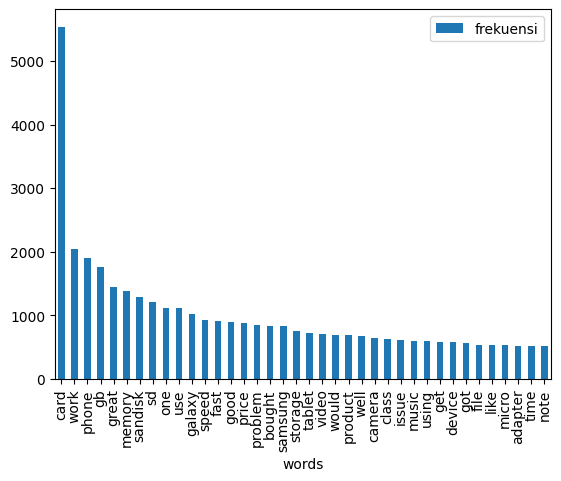

In [ ]:
freq_sorted[freq_sorted["frekuensi"] > 500].plot.bar(x = "words", y = "frekuensi")
plt.show()

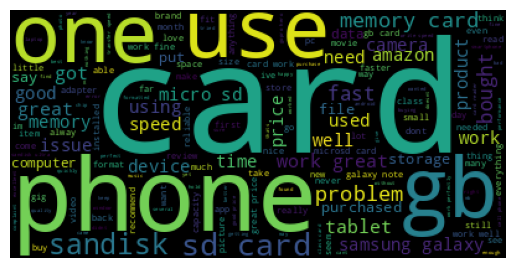

In [ ]:
text = " ".join(i for i in df.lematization_result)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['lematization_result'].apply(lambda x: sia.polarity_scores(x))

,lematization_result
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
3,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp..."
4,"{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp..."
...,...
4910,"{'neg': 0.133, 'neu': 0.727, 'pos': 0.14, 'com..."
4911,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp..."
4912,"{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'comp..."
4913,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp..."


In [ ]:
df['polarity_score'] = df['lematization_result'].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
df[['lematization_result', 'polarity_score']]

,lematization_result,polarity_score
0,issue,0.00
1,purchased device worked advertised never much ...,0.00
2,work expected higher capacity think made bit e...,0.40
3,think worked gb card went south one held prett...,0.65
4,bought retail packaging arrived legit envelope...,0.86
...,...,...
4910,bought sandisk gb class use htc inspire month ...,0.08
4911,used capability samsung galaxy note greatly ex...,0.18
4912,great card fast reliable come optional adapter...,0.85
4913,good amount space stuff want fit gopro say,0.69


Memberi label apakah reviewnya negatif (neg) atau positif (pos) atau netral (neg)

In [ ]:
df['sentimen_label']=df['lematization_result'].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "net" if sia.polarity_scores(x)["compound"] == 0 else "neg")

In [ ]:
df[['lematization_result', 'polarity_score', 'sentimen_label']]

,lematization_result,polarity_score,sentimen_label
0,issue,0.00,net
1,purchased device worked advertised never much ...,0.00,net
2,work expected higher capacity think made bit e...,0.40,pos
3,think worked gb card went south one held prett...,0.65,pos
4,bought retail packaging arrived legit envelope...,0.86,pos
...,...,...,...
4910,bought sandisk gb class use htc inspire month ...,0.08,pos
4911,used capability samsung galaxy note greatly ex...,0.18,pos
4912,great card fast reliable come optional adapter...,0.85,pos
4913,good amount space stuff want fit gopro say,0.69,pos


In [ ]:
df["sentimen_label"].value_counts()

,count
sentimen_label,
pos,3944
neg,642
net,329


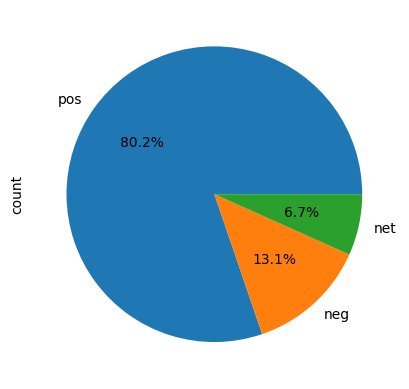

In [ ]:
# visualisasi dengan piechart
df["sentimen_label"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
# di encoder untuk sentimen label agar berbentuk angka
df["sentimen_label"] = LabelEncoder().fit_transform(df["sentimen_label"])

In [ ]:
df[['lematization_result', 'polarity_score', 'sentimen_label']]

,lematization_result,polarity_score,sentimen_label
0,issue,0.00,1
1,purchased device worked advertised never much ...,0.00,1
2,work expected higher capacity think made bit e...,0.40,2
3,think worked gb card went south one held prett...,0.65,2
4,bought retail packaging arrived legit envelope...,0.86,2
...,...,...,...
4910,bought sandisk gb class use htc inspire month ...,0.08,2
4911,used capability samsung galaxy note greatly ex...,0.18,2
4912,great card fast reliable come optional adapter...,0.85,2
4913,good amount space stuff want fit gopro say,0.69,2


In [ ]:
df["sentimen_label"].value_counts()

,count
sentimen_label,
2,3944
0,642
1,329


# Victorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Membandingkan 2 metode


1.   Bag of Words (BoW) : Teknik ini mengonversi teks menjadi representasi vektor berdasarkan frekuensi kata-kata yang muncul dalam korpus teks.
2.   TF-IDF (Term Frequency-Inverse Document Frequency) :  perbaikan dari BoW yang mempertimbangkan tidak hanya frekuensi kata dalam dokumen, tetapi juga pentingnya kata di seluruh korpus. Semakin jarang kata muncul di dokumen lain, semakin tinggi bobotnya.

masing masing menggunakan 1 kata saja untuk di vektorkan , dan memakai N-gram frequency untuk memilih beberapa kata yang divektorkan



In [ ]:
X = df["lematization_result"]
y = df["sentimen_label"]

**Bag of Words (BoW)**



In [ ]:
## Word frequency

vectorizer = CountVectorizer()

X_count = vectorizer.fit_transform(X)
vectorizer.get_feature_names_out()

X_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.set_option('display.max_columns', None, "display.max_columns", None)
print(pd.DataFrame(X_count.toarray(), columns = vectorizer.get_feature_names_out()))

      ability  able  absolute  absolutely  abuse  accept  acceptable  accepted  accepting  accepts  access  accessed  accessible  accessing  accessory  accident  accidentally  accidently  \
0           0     0         0           0      0       0           0         0          0        0       0         0           0          0          0         0             0           0   
1           0     0         0           0      0       0           0         0          0        0       0         0           0          0          0         0             0           0   
2           0     0         0           0      0       0           0         0          0        0       0         0           0          0          0         0             0           0   
3           0     0         0           0      0       0           0         0          0        0       0         0           0          0          0         0             0           0   
4           0     0         0           0      0  

In [ ]:
## N-Gram Frequency

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2,2))

X_count2 = vectorizer2.fit_transform(X)
vectorizer2.get_feature_names_out()
X_count2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**TF-IDF (Term Frequency-Inverse Document Frequency)**

In [ ]:
## Word frequency
tf_idf_word_vectorizer = TfidfVectorizer()

X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [ ]:
## N-gram frequency
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2,3))

X_tf_idf_ngram = tf_idf_word_vectorizer.fit_transform(X)

# **MODEL SENTIMEN ANALYSIS**

## lOGISTIC REGRESSION


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate


Model dengan vektor TF IDF

In [ ]:
# word frequency
log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring = 'accuracy',
                cv = 5).mean()

0.8272634791454729

In [ ]:
# N-gram frequency
log_model2 = LogisticRegression().fit(X_tf_idf_ngram, y)

cross_val_score(log_model2,
                X_tf_idf_ngram,
                y,
                scoring = 'accuracy',
                cv = 5).mean()

0.8272634791454729

**BOW**

In [ ]:
#word frequency
log_model3 = LogisticRegression().fit(X_count, y)

cross_val_score(log_model3,
                X_count,
                y,
                scoring = 'accuracy',
                cv = 5).mean()

0.8541200406917598

In [ ]:
#N-gram frequency
log_model4 = LogisticRegression().fit(X_count2, y)

cross_val_score(log_model4,
                X_count2,
                y,
                scoring = 'accuracy',
                cv = 5).mean()

0.8038657171922685

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

TF-IDF

In [ ]:
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8152594099694813

In [ ]:
rf_model2 = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.8164801627670396

BOW

In [ ]:
rf_model3 = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model3, X_count, y, cv=5, n_jobs=-1).mean()

0.8240081383519838

In [ ]:
rf_model4 = RandomForestClassifier().fit(X_count2, y)
cross_val_score(rf_model4, X_count2, y, cv=5, n_jobs=-1).mean()

# Kesimpulan


dari bebebreapa metode vectorization dan model machine learning
didapat model yang paling baik yaitu
1. vectorization = menggunakan BOW dengan word frequency
2. model machine learning = logistic regression